# Biased coexistence simulations results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os.path
from matplotlib.patches import Ellipse
from scipy.interpolate import interp1d, UnivariateSpline

### Data for ice III, IV, V, and XIII

In [2]:
melt_temp_iceIII=np.array([283.69474423,282.07427948,278.25435387,275.14883268])
melt_temp_pressures_iceIII=np.array([4000., 3500., 3000., 2500.])
melt_temp_errors_iceIII=np.array([2.27647789,2.15273643,1.79908514,2.17843127])

In [3]:
melt_temp_iceIV=np.array([282.87926714,280.05103312,273.30439595,268.66763651])-(268.66763654-261.65-1)
melt_temp_pressures_iceIV=np.array([4000., 3500., 3000., 2500.])
melt_temp_errors_iceIV=np.array([2.44777992,2.33341923,1.98778609,2.2913871])

In [4]:
melt_temp_iceV=np.array([278.29737688,275,268.61994016,263.77672504,254.9844139])
melt_temp_pressures_iceV=np.array([3500.,3000.,2500.,2250.,2000.])
melt_temp_errors_iceV=np.array([4.73140832,3,2.79898078,4.9114603,5.44841407])

In [5]:
melt_temp_iceXIII=np.array([272.12728867,264.63198989,261.62273915,259.29433695])
melt_temp_pressures_iceXIII=np.array([4000.,3500.,3000.,2750.])
melt_temp_errors_iceXIII=np.array([3.01938491,2.91778503,3.48782681,1.97965259])

### Plots

#### Plot for Figure 3a

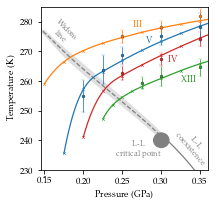

In [11]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.0,3.0)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

symbol_size=7.5
symbol_size2=3
mycapsize=2
mylinewidth=1.25
myelinewidth=0.75

plt.errorbar(melt_temp_pressures_iceXIII/10000,melt_temp_iceXIII,melt_temp_errors_iceXIII,marker='o',markeredgecolor='black',markeredgewidth=0.25,markersize=symbol_size2,ls='none',capsize=mycapsize,elinewidth=myelinewidth,color=colors[2],label="L-Ice XIII coexistence (biased)")

plt.errorbar(melt_temp_pressures_iceIV/10000,melt_temp_iceIV,melt_temp_errors_iceIV,marker='o',markeredgecolor='black',markeredgewidth=0.25,markersize=symbol_size2,ls='none',capsize=mycapsize,elinewidth=myelinewidth,color=colors[3],label="L-Ice XIII coexistence (biased)")

plt.errorbar(melt_temp_pressures_iceV/10000,melt_temp_iceV,melt_temp_errors_iceV,marker='o',markeredgecolor='black',markeredgewidth=0.25,markersize=symbol_size2,ls='none',capsize=mycapsize,elinewidth=myelinewidth,color=colors[0],label="L-Ice XIII coexistence (biased)")

plt.errorbar(melt_temp_pressures_iceIII/10000,melt_temp_iceIII,melt_temp_errors_iceIII,marker='o',markeredgecolor='black',markeredgewidth=0.25,markersize=symbol_size2,ls='none',capsize=mycapsize,elinewidth=myelinewidth,color=colors[1],label="L-Ice III coexistence (biased)")

widom=np.genfromtxt("../DataLLT/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
plt.fill_betweenx(widom[:,0],widom[:,1]-widom[:,2],widom[:,1]+widom[:,2],color='gray',alpha=0.25,linewidth=0)
plt.plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=mylinewidth,label="Widom line")
binodal=np.genfromtxt("../DataLLT/BinodalLine.txt")
plt.plot(binodal[:,1]/10000,binodal[:,0],color='gray',linewidth=mylinewidth,label="L-L coexistence")
ellipse=Ellipse((3000/10000,240),200/10000,5,alpha=1.0,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)



# Load clausius-clapeyron
thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceIV.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[3],s=symbol_size,linewidth=0.5)
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.1)
x=np.linspace(0.2,0.41,1000)
plt.plot(x,f_spline(x),color=colors[3],linewidth=mylinewidth)

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceV.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[0],s=symbol_size,linewidth=0.5)
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.175,0.41,1000)
plt.plot(x,f_spline(x),color=colors[0],linewidth=mylinewidth)


thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceXIII.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[2],s=symbol_size,linewidth=0.5)
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.225,0.41,1000)
plt.plot(x,f_spline(x),color=colors[2],linewidth=mylinewidth)

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceIII.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[1],s=symbol_size,linewidth=0.5)
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.15,0.41,1000)
plt.plot(x,f_spline(x),color=colors[1],linewidth=mylinewidth)

plt.text(0.27,237,"L-L \n critical point",color='gray',va='center',ha='center',fontsize=8)
plt.text(0.34,238,"L-L \n coexistence",color='gray',va='center',ha='center',rotation=-49,fontsize=8)
plt.text(0.174,276,"Widom \n line",color='gray',va='center',ha='center',rotation=-45,fontsize=8)
plt.text(0.335,260,"XIII",color=colors[2],va='center',ha='center')
plt.text(0.315,267,"IV",color=colors[3],va='center',ha='center')
plt.text(0.285,273.5,"V",color=colors[0],va='center',ha='center')
plt.text(0.27,278.5,"III",color=colors[1],va='center',ha='center')

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")
plt.xlim([0.145,0.36])
plt.ylim([230,285])

#plt.savefig("main-scan.pdf",bbox_inches='tight')  # publication quality

plt.show()

#### Plot for Figure SI-15

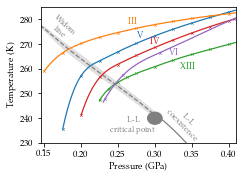

In [7]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5,2.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

symbol_size=7.5
symbol_size2=3
mycapsize=2
mylinewidth=1.25
myelinewidth=0.75

widom=np.genfromtxt("../DataLLT/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
plt.fill_betweenx(widom[:,0],widom[:,1]-widom[:,2],widom[:,1]+widom[:,2],color='gray',alpha=0.25,linewidth=0)
plt.plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=mylinewidth,label="Widom line")
binodal=np.genfromtxt("../DataLLT/BinodalLine.txt")
plt.plot(binodal[:,1]/10000,binodal[:,0],color='gray',linewidth=mylinewidth,label="L-L coexistence")
ellipse=Ellipse((3000/10000,240),200/10000,5,alpha=1.0,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)

# Load clausius-clapeyron
thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceIV.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[3],s=symbol_size,linewidth=0.5)
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.1)
x=np.linspace(0.2,0.41,1000)
plt.plot(x,f_spline(x),color=colors[3],linewidth=mylinewidth)

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceV.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[0],s=symbol_size,linewidth=0.5)
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.175,0.41,1000)
plt.plot(x,f_spline(x),color=colors[0],linewidth=mylinewidth)


thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceXIII.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[2],s=symbol_size,linewidth=0.5)
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.225,0.41,1000)
plt.plot(x,f_spline(x),color=colors[2],linewidth=mylinewidth)

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceIII.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[1],s=symbol_size,linewidth=0.5)
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.15,0.41,1000)
plt.plot(x,f_spline(x),color=colors[1],linewidth=mylinewidth)

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceVI.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[4],s=symbol_size,linewidth=0.5)
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.23,0.41,1000)
plt.plot(x,f_spline(x),color=colors[4],linewidth=mylinewidth)

plt.text(0.27,237,"L-L \n critical point",color='gray',va='center',ha='center',fontsize=8)
plt.text(0.34,238,"L-L \n coexistence",color='gray',va='center',ha='center',rotation=-46,fontsize=8)
plt.text(0.174,276,"Widom \n line",color='gray',va='center',ha='center',rotation=-42,fontsize=8)
plt.text(0.345,260.5,"XIII",color=colors[2],va='center',ha='center')
plt.text(0.3,270.5,"IV",color=colors[3],va='center',ha='center')
plt.text(0.325,266,"VI",color=colors[4],va='center',ha='center')
plt.text(0.28,273.25,"V",color=colors[0],va='center',ha='center')
plt.text(0.27,278.5,"III",color=colors[1],va='center',ha='center')

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")
plt.xlim([0.145,0.41])
plt.ylim([230,285])

#plt.savefig("main-scan-iceVI.pdf",bbox_inches='tight')  # publication quality

plt.show()

#### Plot for Figure 3b

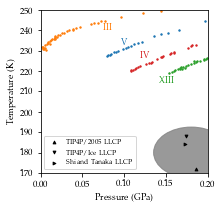

In [8]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.0,3.0)

mysymbolsize=2
thermo = np.genfromtxt("../ExperimentalResultsDigitized/D2O/iceIII.txt")
plt.scatter(thermo[:,0],thermo[:,1],color=colors[1],s=mysymbolsize)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/D2O/iceV.txt")
plt.scatter(thermo[:,0],thermo[:,1],color=colors[0],s=mysymbolsize)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/D2O/iceIV.txt")
plt.scatter(thermo[:,0],thermo[:,1],color=colors[3],s=mysymbolsize)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/D2O/iceXIII.txt")
plt.scatter(thermo[:,0],thermo[:,1],color=colors[2],s=mysymbolsize)

plt.text(0.15,215,"XIII",color=colors[2],va='center',ha='center')
plt.text(0.125,227,"IV",color=colors[3],va='center',ha='center')
plt.text(0.100,234,"V",color=colors[0],va='center',ha='center')
plt.text(0.080,241,"III",color=colors[1],va='center',ha='center')

ellipse=Ellipse((1800/10000,180),2*450/10000,2*12.5,alpha=0.8,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)

plt.scatter(0.1861,172,marker='^',s=symbol_size,color='black',label="TIP4P/2005 LLCP")
plt.scatter(0.1739,188,marker='v',s=symbol_size,color='black',label="TIP4P/Ice LLCP")
plt.scatter(0.173,184,marker='>',s=symbol_size,color='black',label="Shi and Tanaka LLCP")

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")
plt.xlim([0.0,0.2])
plt.ylim([170,250])
plt.legend(fontsize=7)

#plt.savefig("main-exp.pdf",bbox_inches='tight')  # publication quality

plt.show()

#### Plot for Figure SI-17

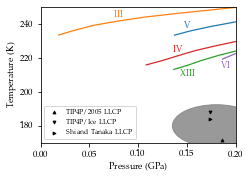

In [9]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5,2.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


symbol_size=7.5
symbol_size2=3
mycapsize=2
mylinewidth=1.25
myelinewidth=0.75

mysymbolsize=2

thermo = np.genfromtxt("../ExperimentalResultsDigitized/H2O/iceIII.txt")
plt.plot(thermo[:,0],thermo[:,1],color=colors[1],linewidth=mylinewidth)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/H2O/iceV.txt")
plt.plot(thermo[:,0],thermo[:,1],color=colors[0],linewidth=mylinewidth)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/H2O/iceIV.txt")
plt.plot(thermo[:,0],thermo[:,1],color=colors[3],linewidth=mylinewidth)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/H2O/iceXIII.txt")
plt.plot(thermo[:,0],thermo[:,1],color=colors[2],linewidth=mylinewidth)

thermo = np.genfromtxt("../ExperimentalResultsDigitized/H2O/iceVI.txt")
plt.plot(thermo[:,0],thermo[:,1],color=colors[4],linewidth=mylinewidth)

plt.text(0.15,210,"XIII",color=colors[2],va='center',ha='center')
plt.text(0.14,224,"IV",color=colors[3],va='center',ha='center')
plt.text(0.15,239,"V",color=colors[0],va='center',ha='center')
plt.text(0.080,245,"III",color=colors[1],va='center',ha='center')
plt.text(0.19,215,"VI",color=colors[4],va='center',ha='center')

ellipse=Ellipse((1800/10000,180),2*450/10000,2*12.5,alpha=0.8,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)

plt.scatter(0.1861,172,marker='^',s=symbol_size,color='black',label="TIP4P/2005 LLCP")
plt.scatter(0.1739,188,marker='v',s=symbol_size,color='black',label="TIP4P/Ice LLCP")
plt.scatter(0.173,184,marker='>',s=symbol_size,color='black',label="Shi and Tanaka LLCP")

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")
plt.xlim([0.0,0.2])
plt.ylim([170,250])
plt.legend(fontsize=7)

#plt.savefig("si-exp.pdf",bbox_inches='tight')  # publication quality

plt.show()

#### Plot for Figure SI-16

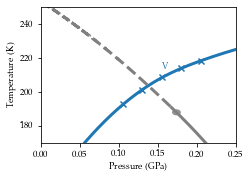

In [10]:
# Data of liquid-liquid coexistence and Widom line provided by Jack Weis
data=np.genfromtxt("../ClausiusClapeyron/TIP4PIce/LLT-data/max_Kt.json")
plt.plot(data[1,:]/1000,data[0,:],'--',color='gray',linewidth=3,label="Widom line")
data=np.genfromtxt("../ClausiusClapeyron/TIP4PIce/LLT-data/coexistence_up.csv")
plt.plot(data[1,:]/1000,data[0,:],color='gray',linewidth=3,label="Binodal")

thermo = np.genfromtxt("../ClausiusClapeyron/Results/thermo_condition_iceV_TIP4PIce.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[0])
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.1)
x=np.linspace(0.05,0.41,1000)
plt.plot(x,f_spline(x),color=colors[0],linewidth=3)

ellipse=Ellipse((0.1739,188),0.01,3,alpha=0.8,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)

plt.text(0.16,215,"V",color=colors[0],va='center',ha='center')

plt.xlim([0.0,0.25])
plt.ylim([170,250])

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")

plt.show()